## Model description

A chemical reaction is said to be *autocatalytic* if one of the reaction products is also a catalyst for the same or a coupled reaction, and such a reaction is called an autocatalytic reaction. We refer to the wikipedia article [Autocatalysis](https://en.wikipedia.org/wiki/Autocatalysis) for details.

The Brusselator is a mathematical model for a class of autocatalytic reactions. The dynamics of the Brusselator is given by the two-dimensional ODE

$$
   \left\{ \begin{array}{lcl} \dot{x} & = & A + x^2\cdot y - B\cdot x - x \\ \dot{y} & = & B\cdot x - x^2\cdot y \end{array} \right.
$$

The numerical values for the model's constants (in their respective units) are given in the following table.

|Quantity|Value|
|-----|-------|
|A    | 1     |
|B    | 1.5   |

In [1]:
using Reachability, TaylorIntegration, MathematicalSystems

In [2]:
@taylorize function brusselator!(du, u, p, t)
    local A = 1.0
    local B = 1.5

    du[1] = (A + ((u[1]*u[1]) * u[2])) - (B + 1) * u[1]
    du[2] = B * u[1] - ((u[1]*u[1])*u[2])

    return du
end

## Reachability settings

The initial set is defined by $x \in [0.8,1]$, $y \in [0,0.2]$. These settings are taken from reference [1].

[1] X. Chen, E. Abraham, S. Sankaranarayanan. *Flow*: An Analyzer for Non-Linear Hybrid Systems.* In Proceedings of the 25th International Conference on Computer Aided Verification (CAV’13), Volume 8044 of LNCS, pages 258-263, Springer, 2013.

In [3]:
x₀ = Interval(0.8, 1.0)
y₀ = Interval(0.0, 0.2)

X₀ = x₀ × y₀;

In [4]:
S = BlackBoxContinuousSystem(brusselator!, 2)
P = InitialValueProblem(S, X₀);

## Results

In [5]:
sol = solve(P, Options(:T=>15.0),
            op=TMJets(Options(:max_steps=>1_000, :abs_tol=>1e-10, :orderT=>6, :orderQ=>2,:output_type=>Zonotope)));

In [6]:
using Plots, LaTeXStrings

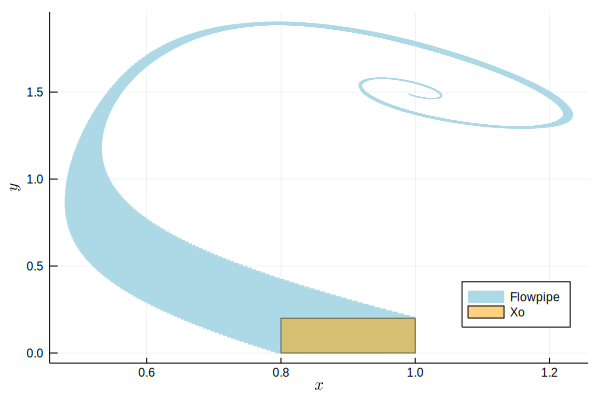

In [7]:
plot(sol, xlab=L"x", ylab=L"y", lw=0.2, color=:lightblue, lab="Flowpipe", legend=:bottomright)
plot!(X₀, color=:orange, lab="Xo")